In [ ]:
!pip install jupyter-dash

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for plotting
import seaborn as sns; sns.set() # For a different plotting theme
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/case studies/hr case study/employees.csv")

In [ ]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


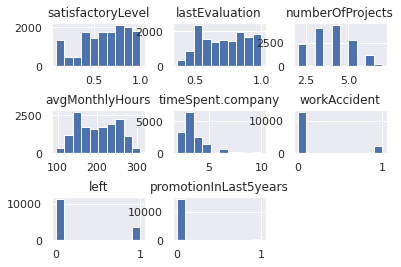

In [ ]:
df.hist()
plt.subplots_adjust(hspace=1)
plt.show()

# Cleaning the dataset:
* na values
* duplicate values

In [ ]:
#Data Preprocessing
#print(df.isnull().sum())
print(df.isna().sum())

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64


In [ ]:
#Mean,Median, ---- filling of missing values
#dropping all the records of missing values----> dropna()


In [ ]:
#check duplicate records and have the uique records:
#overfitting of the model arises due to duplicate

In [ ]:
df[df.duplicated()]

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
263,0.46,0.57,2,139,3,0,1,0,sales,low
877,0.37,0.51,2,127,3,0,1,0,sales,medium
974,0.42,0.53,2,142,3,0,1,0,sales,low
1017,0.40,0.50,2,127,3,0,1,0,IT,low
1241,0.10,0.85,6,266,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14985,0.95,0.84,3,270,3,1,0,1,sales,medium
14987,0.37,0.45,2,126,3,0,1,0,support,medium
14988,0.43,0.57,2,157,3,0,1,0,sales,low
14993,0.61,0.89,3,242,10,0,0,0,sales,high


In [ ]:
#removing the duplicate dataset( unique id is not present)
df=df.drop_duplicates(keep="first")
df.shape

(11991, 10)

In [ ]:
df.corr()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
satisfactoryLevel,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
lastEvaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
numberOfProjects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
avgMonthlyHours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
timeSpent.company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
workAccident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotionInLast5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


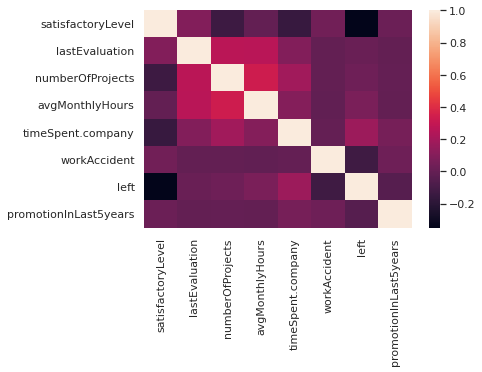

In [ ]:
sns.heatmap(df.corr())

In [ ]:
fig2=px.imshow(df.corr(),aspect=True,color_continuous_scale='greens')
fig2.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



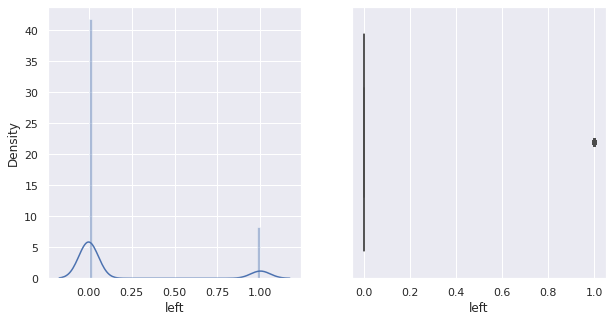

In [ ]:
# Interested variable left
fig=plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(df['left'])
plt.subplot(1,2,2)
sns.boxplot(x=df['left'])

In [ ]:
# Interested variable left
fig1=px.histogram(df,x='left',marginal='box',title='Left',barmode='group')
fig1.update_layout(bargap=0.2)
fig1.show()

In [ ]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [ ]:
fig=px.sunburst(df,path=['left','timeSpent.company'])
fig.show()

In [ ]:
fig3 = px.sunburst(df, path=['left','promotionInLast5years','salary','timeSpent.company','dept'],title='left followed by promotion in last 5 years then salary followed by timespent company followed by department')
fig3.show()

In [ ]:
df["sat_level_group"]=pd.qcut(df.satisfactoryLevel,[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
a = df.sat_level_group.value_counts()
a = a/a.sum()
a

(0.239, 0.43]    0.126500
(0.79, 0.86]     0.118560
(0.59, 0.66]     0.112281
(0.66, 0.73]     0.111634
(0.92, 1.0]      0.110342
(0.43, 0.52]     0.109418
(0.52, 0.59]     0.107756
(0.73, 0.79]     0.106648
(0.86, 0.92]     0.096861
Name: sat_level_group, dtype: float64

In [ ]:
z = df['satisfactoryLevel']
z.index = df['sat_level'].index.astype(str)
z.head()

In [ ]:
fig=px.histogram(df,x='sat_level_group',color='left',title='satisfied vs left',barmode='group')
fig.show()
'''
# build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
app.layout = html.Div([dcc.Graph(figure=fig)])
 # run app inline
app.run_server(mode='inline')
'''

In [ ]:
fig4 = px.sunburst(df, path=["sat_level_group"],title='left followed by promotion in last 5 years followed by timespent company followed by department')
fig4.show()

In [ ]:
fig= px.histogram(z,barmode='group',marginal='box')
fig.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

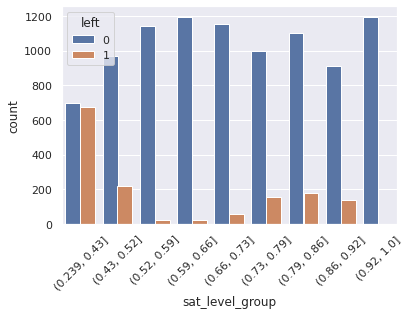

In [ ]:

sns.countplot(x="sat_level_group",data=df,hue='left')
plt.xticks(rotation=45)

In [ ]:
fig2=px.histogram(df,x='numberOfProjects',color='left',title='number of projects',barmode='group')
fig2.show()

In [ ]:
_# Data visualisation analyzing different features
ftr=['dept','numberOfProjects','timeSpent.company','workAccident','salary','promotionInLast5years']

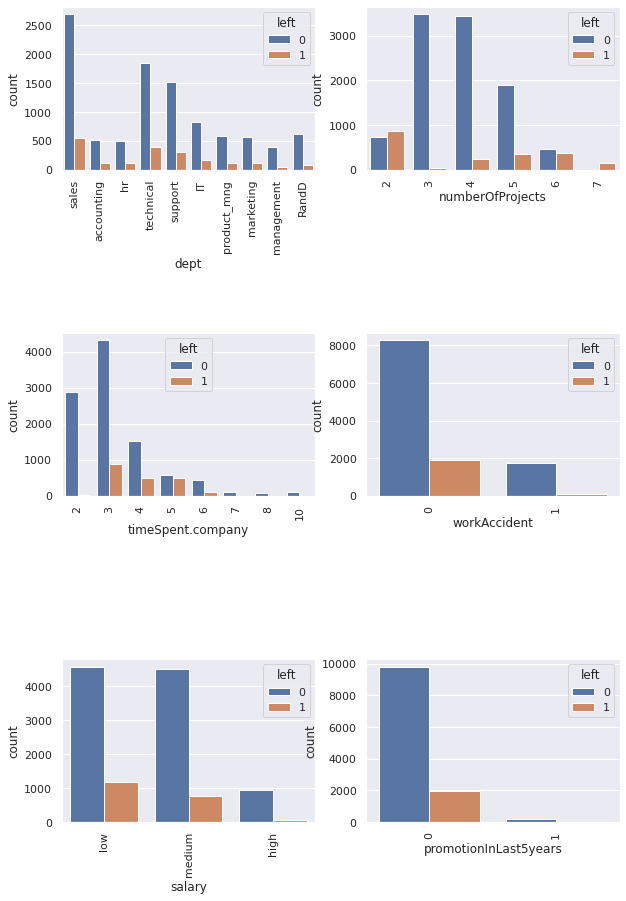

In [ ]:
fig=plt.subplots(figsize=(10,15))
for p,q in enumerate(ftr):
  plt.subplot(3,2,p+1)
  plt.subplots_adjust(hspace=1.0)
  sns.countplot(x=q,data=df,hue="left")
  plt.xticks(rotation=90)

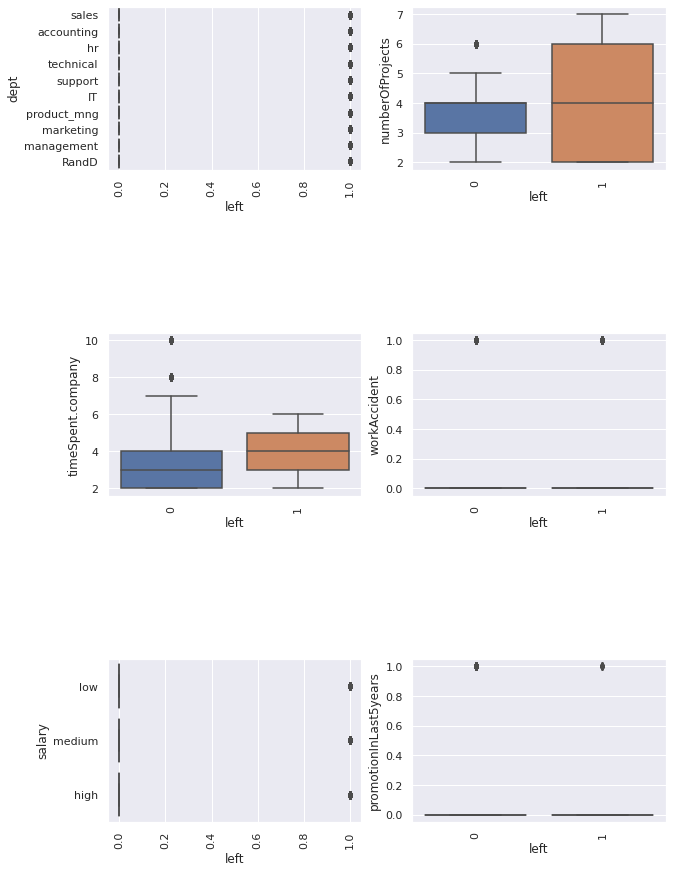

In [ ]:
fig=plt.subplots(figsize=(10,15))
for p,q in enumerate(ftr):
  plt.subplot(3,2,p+1)
  plt.subplots_adjust(hspace=1.0)
  sns.boxplot(y=q,data=df,x="left")
  plt.xticks(rotation=90)

# attrition rate: numberof employess left/number of total employees
* sales,Technical and support
* projects working more than 4 or less than 3
* time spent 3 to 6 year
* no promotions 
* lower the salary higher the quit(low and medium)
## conclusion
* promotion less quitting
*  Time with company: after 3 years crucial point
* number of projects or more than 5 just shift to 2 or less
* salary with low and medium should be increased.


In [ ]:
#Drill report: Dash(web hosting),plotly
#powerbi and tableau

In [ ]:
# build jupyter dash app 
app = JupyterDash(__name__)
 # add html components and figure to app
#app.layout = html.Div([dcc.Graph(figure=fig)])
app.layout = html.Div([
    html.Div([
        html.Div([
            html.H3('Column 1'),
            dcc.Graph(id='g1', figure=fig1)
        ], className="six columns"),

        html.Div([
            html.H3('Column 2'),
            dcc.Graph(id='g2', figure=fig2)
        ], className="six columns"),
        html.Div([
            html.H3('Column 3'),
            dcc.Graph(id='g3', figure=fig3)
        ], className="six columns"),
        ], className="row")
])
 # run app inline
app.run_server()

Dash app running on:


<IPython.core.display.Javascript object>